<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/python_math/blob/main/math__GradientDescentMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient descent method
Gradient descent is an iterative optimization algorithm for finding the local minimum of a function. To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point.

[Read more about gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent)

[Optimization algorithms here](https://habr.com/ru/articles/318970/)
___

In [82]:
import numpy as np
import matplotlib.pyplot as plt

## For one param

In [83]:
N = 20        # number of iterations
xx = 0        # initial value
lmd = 0.1     # convergence step

In [84]:
def function(x):
  # return x * x - 5 * x + 5
  return np.sin(x) + 0.5 * x


In [85]:
def derivative(x):
  # return 2 * x - 5
  return np.cos(x) + 0.5

In [86]:
# x_plt = np.arange(0, 5, 0.1)
x_plt = np.arange(-5, 5, 0.1)
f_plt = [function(x) for x in x_plt]

0 - -1.0
1 - -1.5
2 - -1.8333333333333333
3 - -2.083333333333333
4 - -2.283333333333333
5 - -2.1166666666666667
6 - -1.973809523809524
7 - -2.098809523809524
8 - -1.9876984126984127
9 - -2.087698412698413
10 - -2.187698412698413
11 - -2.087698412698413
12 - -2.187698412698413
13 - -2.087698412698413
14 - -2.187698412698413
15 - -2.087698412698413
16 - -2.187698412698413
17 - -2.087698412698413
18 - -2.187698412698413
19 - -2.087698412698413
Result value - -2.087698412698413


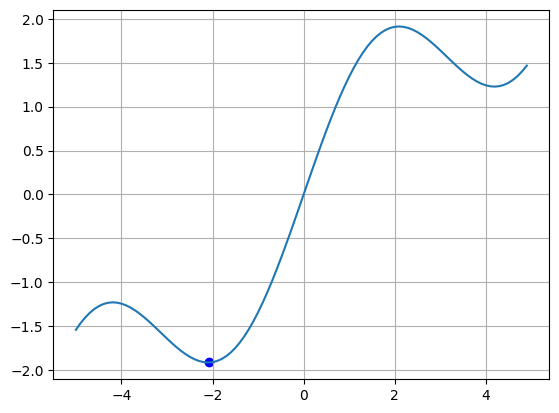

In [87]:
%matplotlib inline

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x_plt, f_plt)

mn = 10

for i in range(N):
  lmd = 1 / min(i + 1, mn)
  xx = xx - lmd * np.sign(derivative(xx))

  print(f'{i} - {xx}')

print(f'Result value - {xx}')

ax.scatter(xx, function(xx), c='blue')
plt.show()


## For two params

In [88]:
from mpl_toolkits.mplot3d import Axes3D

In [89]:
def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T, (y-ff))

In [90]:
def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*np.dot((y - ff).T, range(N))

In [91]:
def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*(y - ff).sum()

In [92]:
N = 100            # number of experiments
Niter = 50         # number of iterations
sigma = 3          # standard deviation of observed values
at = 0.5           # theoretical value of parameter k
bt = 2             # theoretical value of parameter b

aa = 0             # initial approximation
bb = 0             # initial approximation
lmd1 = 0.000001
lmd2 = 0.0005

In [93]:
f = np.array([at*z+bt for z in range(N)])
y = np.array(f + np.random.normal(0, sigma, N))

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
# E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

In [94]:
fig = plt.figure()
# ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
# ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

# ax.set_xlabel('a')
# ax.set_ylabel('b')
# ax.set_zlabel('E')

# point = ax.scatter(aa, bb, E(y, aa, bb), c='red')

for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)

    # ax.scatter(aa, bb, E(y, aa, bb), c='red')

    print(aa, bb)

# plt.show()

0.35175977288920607 0.9552559729406075
0.46306186878995853 1.2640409738784293
0.4982149068034024 1.3679399365559217
0.5092543450229106 1.4068037837790996
0.5126594320761582 1.4249260653663842
0.513648987873824 1.4363378175964945
0.5138757260320845 1.445486040720204
0.5138629978328907 1.453782446117552
0.5137764938286737 1.461677405796039
0.513668636903209 1.4693167612877283
0.5135559800013292 1.4767498328945534
0.5134437174780063 1.483995296831144
0.5133334476607773 1.4910620499693596
0.5132256311764543 1.4979558193911526
0.5131203694601104 1.5046812573666684
0.513017651276932 1.5112426065513653
0.5129174307677183 1.5176439123382004
0.5128196521396156 1.5238890917554606
0.512724257460357 1.5299819568933248
0.5126311891021027 1.5359262238907614
0.5125403904914394 1.5417255173112376
0.512451806323536 1.547383373020788
0.5123653826071702 1.552903240555394
0.5122810666567492 1.5582884852911232
0.512198807068086 1.5635423905171628
0.51211855368956 1.5686681594443017
0.5120402575923335 1.573

<Figure size 640x480 with 0 Axes>

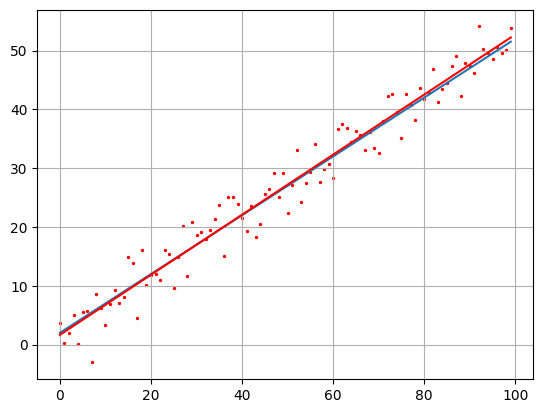

In [95]:
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()

# Optimizations

In [96]:
N = 10          # number of iterations
xx = 9999        # initial value
gamma = 0.9     # inertial complementary syllable. 0 < γ < 1

In [97]:
def f(x):
  # return np.sin(x) + 0.5 * x
  # return np.log(x)
  return x*x * 0.1

In [98]:
def df(x):
  # return np.cos(x) + 0.5
  return 2*x

In [99]:
x_plt = np.arange(-10000, 10000, 1)
f_plt = [f(x) for x in x_plt]

## inertial complementary syllable

0 = -9999.0
1 = -17998.2
2 = 2999.7000000000007
3 = 12298.77
4 = 6029.396999999999
5 = -407.95920000000115
6 = -2100.218528571429
7 = -1470.2601021428572
8 = -670.9864660714286
9 = -242.73715242857145
Result value = -242.73715242857145


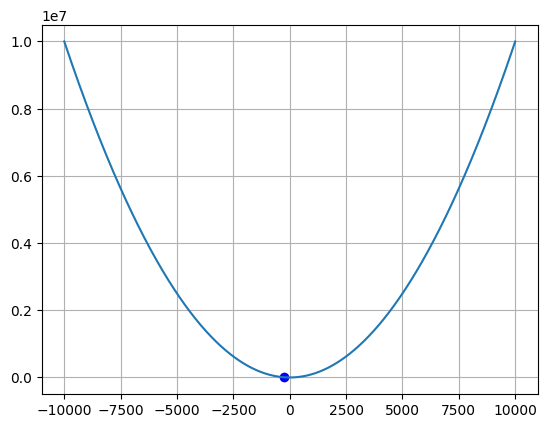

In [100]:
%matplotlib inline

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x_plt, f_plt)

mn = 100
prev_v = 0

for i in range(N):
  lmd = 1 / min(i + 1, 10)
  v = lmd * df(xx)

  xx = xx - ((gamma * prev_v) + v)
  prev_v = v

  print(f'{i} = {xx}')

print(f'Result value = {xx}')

ax.scatter(xx, f(xx), c='blue')
plt.show()

## Nesterov accelarated gradient descent

0 = 242.73715242857145
1 = -436.92687437142865
2 = 262.1561246228572
3 = -183.50928723600003
4 = 50.3339759275886
5 = -36.59699499735086
6 = -3.7870324745519
7 = -10.222515923543693
8 = -6.6637490285134025
9 = -5.971577263916174
Result value = -5.971577263916174


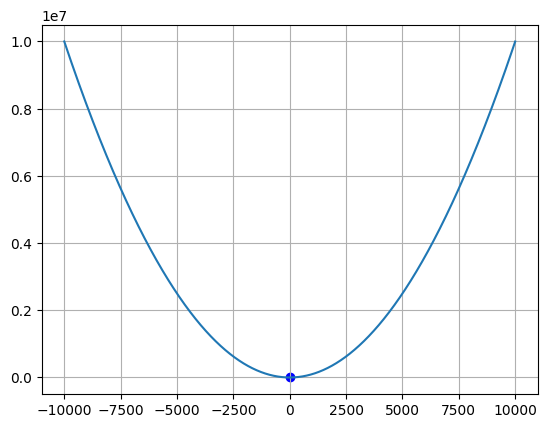

In [101]:
%matplotlib inline

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x_plt, f_plt)

mn = 10
prev_v = 0

for i in range(N):
  lmd = 1 / min(i + 1, mn)
  v = lmd * df(xx - (gamma * prev_v))

  xx = xx - v
  prev_v = v

  print(f'{i} = {xx}')

print(f'Result value = {xx}')

ax.scatter(xx, f(xx), c='blue')
plt.show()

## Adagrad (adaptive gradient)

0 = -5.087841639118512
1 = -4.787087708131439
2 = -4.622907279068618
3 = -4.515523573347336
4 = -4.438146480397216
5 = -4.378908690326611
6 = -4.331633790036552
7 = -4.292745441233661
8 = -4.260008963648964
9 = -4.2319457412970065
Result value = -4.2319457412970065


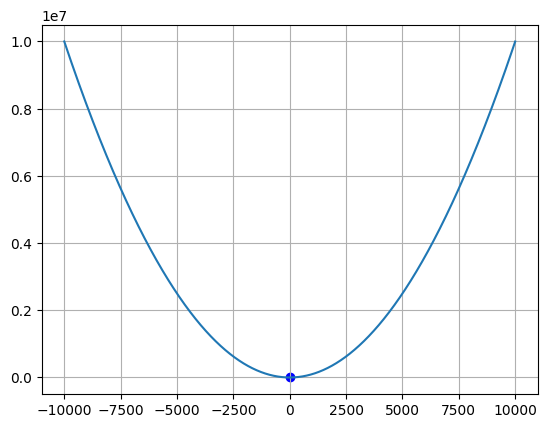

In [102]:
%matplotlib inline

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x_plt, f_plt)

mn = 10
G = 0

for i in range(N):
  lmd = 1 / min(i + 1, mn)
  G += xx * xx
  v = lmd / np.sqrt(G + N) * xx
  xx = xx - v

  print(f'{i} = {xx}')

print(f'Result value = {xx}')

ax.scatter(xx, f(xx), c='blue')
plt.show()

# Adadelta

0 = -0.31518874392931373
1 = 3.147607427500532e-05
2 = -1.651097130360695e-08
3 = 7.895585884089008e-12
4 = -3.4381121512936465e-15
5 = 1.3618300334573189e-18
6 = -4.901996859631071e-22
7 = 1.602083147855684e-25
8 = -4.750135474543144e-29
9 = 1.2767711267116562e-32
Result value = 1.2767711267116562e-32


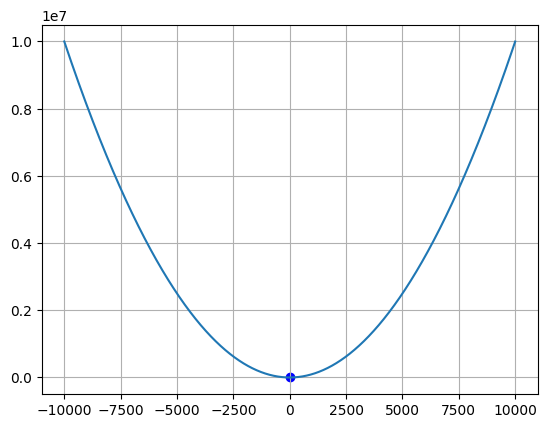

In [103]:
%matplotlib inline

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x_plt, f_plt)

mn = 10
EG = 0

lmd = 1 / min(i + 1, mn)
EDTheta = lmd

for i in range(N):
  EG = gamma*EG + (1 - gamma) * xx * xx
  v = np.sqrt(EDTheta + N) / np.sqrt(EG + N) * xx
  xx = xx - v
  EDTheta = gamma * EDTheta + (1 - gamma) * v * v

  print(f'{i} = {xx}')

print(f'Result value = {xx}')

ax.scatter(xx, f(xx), c='blue')
plt.show()